
<a href="https://colab.research.google.com/github/michalis0/DataMining_and_MachineLearning/blob/master/Assignment1/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



# Data Mining and Machine Learning - Assignment 1

> Topics Covered: Data Cleaning, Exploratory Data Analysis, Visualization and Regression 1 and 2 (up to and including week 5)

**Due: Sunday November 7, 23.59pm**


This assignment is the opportunity to apply the different concepts seen in class so far to a new dataset on the sales of a store.

Run the first few cells to load the dataset and then get started with the questions! 

To complete the assignment you have to do ***both***:

1. Complete the exercises and submit [your Python notebook](https://moodle.unil.ch/mod/assign/view.php?id=841447)
2. Answer the questions to [the quiz on Moodle](https://moodle.unil.ch/mod/quiz/view.php?id=1172387) 
>Note: You can only complete the quiz one time. Have your notebook with the asnwers ready for answering the quiz. 

The answers to the quiz should be supported by your code in the notebook. If they are not, you will not receive points for them.

**IMPORTANT!** You can discuss the questions with other students but **do not exchange code!** This is individual work. We will run your code and check for similarities.

You can post your questions in slack [channel #assignments](https://app.slack.com/client/T02C4KVGVMX/C02BBA2TFQF).


If there is need for further clarifications on the questions, after the assignment is released, we will update the file on GitHub, so make sure you check the git repo of the class for updates.

Good luck!

In [ ]:
# Import required packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")

In [ ]:
# Load the data
df=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/sales.csv')

For the first part we use data on the retail sales of a store over several years. The dataset includes information on items purchased from this store, including for each item or article:
* order ID (a unique identifyier of the order through which this item was purchased)
* date of the order
* date the shipment was made
* mode of shipment used (first class, second class, etc.)
* customer ID (unique identifyier of the client)
* customer name
* client segment (consumer, corporate, etc.)
* country, city, state, postal code, region of the client
* product ID, product category, sub-category, and product name
* sales value for purchased items in USD.

## 1. Understand and Clean the Dataset

>1.1 Show the first 5 or 10 rows to get an idea of the data. 

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



### 1.2 Describe the dataset.

>1.2.1. How many observations(rows) and columns are in the dataset?

In [ ]:
df.shape


(9800, 18)

The data set contains 9800 observations and 18 columns.

> 1.2.2. For which variable(s), if any, are there missing/null values?

In [ ]:
df.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64

There are eleven (11) missing values for Postal Code column.

>1.2.3. Which state generated the highest demand by *number* of items ordered over the entire period?

In [ ]:
df.groupby("State")["Order ID"].count().sort_values(ascending=False).head()

State
California      1946
New York        1097
Texas            973
Pennsylvania     582
Washington       504
Name: Order ID, dtype: int64

California is the state that generated most items.

>... and which state generated the highest demand by total (aggregated) sales over the entire period?

In [ ]:
df.groupby("State")["Sales"].sum().sort_values(ascending=False).head()


State
California      446306.4635
New York        306361.1470
Texas           168572.5322
Washington      135206.8500
Pennsylvania    116276.6500
Name: Sales, dtype: float64

California is the state that generated most sales.

>1.2.4. What percentage of technology items (Hint: look at Category) were shipped first class (Hint: look at Ship Mode)?

In [ ]:
technology = (df["Category"] == "Technology")
is_technology = df[technology]
first_class = (is_technology["Ship Mode"] == "First Class")
is_first_class = is_technology[first_class]
is_first_class.shape

(297, 18)

In [ ]:
is_technology.shape

(1813, 18)

In [ ]:
percentage_first_class = (is_first_class.shape[0] / is_technology.shape[0]) * 100
print(percentage_first_class)

16.381687810259237


The percentage of technology items that were shipped in first class with respect to all technology items is 16,38%.

### 1.3. Data types and handling missing values

>1.3.1. List the different features and their data type. ¶


In [ ]:
df.dtypes

Row ID             int64
Order ID          object
Order Date        object
Ship Date         object
Ship Mode         object
Customer ID       object
Customer Name     object
Segment           object
Country           object
City              object
State             object
Postal Code      float64
Region            object
Product ID        object
Category          object
Sub-Category      object
Product Name      object
Sales            float64
dtype: object

>1.3.2. Are there any duplicated entries?

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9795    False
9796    False
9797    False
9798    False
9799    False
Length: 9800, dtype: bool

In [ ]:
df.loc[df.duplicated()=='True', :]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales


There are no duplicated entries.

>1.3.3. Change the data type for the following columns: Order Date, Ship Date (from string to datetime), Ship Mode and Segment, from string to category. 

In [ ]:
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%d/%m/%Y", errors = 'ignore')
df["Ship Date"] = pd.to_datetime(df["Ship Date"], format="%d/%m/%Y", errors='ignore')
df["Ship Mode"] = df["Ship Mode"].astype("category")
df["Segment"] = df["Segment"].astype("category")
# Let see the changes:
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

>1.3.4. For which order period have these data samples been collected? (i.e, the oldest and the most recent order dates in the dataset)

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [ ]:
min(df["Order Date"]) # df["Order Date"].min()

Timestamp('2015-01-03 00:00:00')

In [ ]:
df["Order Date"].max()

Timestamp('2018-12-30 00:00:00')

The period is from 3rd January 2015 to 30th December of 2018.

>1.3.5. For the postal code column, drop the missing values and set the data type to an integer and then to a string (make sure the final format of the ZIP code is of this kind: 42420 and not 42420.0).


In [ ]:
print(df['Postal Code'].isnull().sum())
#df.dropna(how='any', subset=['Postal Code'])
df.dropna(axis=0, inplace=True)
print(df['Postal Code'].isnull().sum())
df["Postal Code"] = df["Postal Code"].astype(int)
df["Postal Code"] = df["Postal Code"].astype(str)
df.dtypes

11
0


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680



## 2. Exploratory Data Analysis and Visualization

>2.1 Which are the top 5 dates on which the store reached the highest *value* of sales over the entire period included in the dataset?

In [ ]:
# We need to group data by days (dates), sum the sales for each day, and then display the first 5.
#df.groupby(['Order Date'], as_index=False)['Sales'].sum().sort_values(by=['Sales'], ascending=False)
df.groupby(['Order Date'], as_index=False)['Sales'].sum().nlargest(n=5, columns=['Sales'])

,Order Date,Sales
53,2015-03-18,28106.716
824,2017-10-02,18452.972
1161,2018-10-22,15158.877
969,2018-03-23,14816.068
195,2015-09-08,14228.428


>2.2 How many unique customers did the shop have over this period?

In [ ]:
len(df['Customer ID'].unique())

793

>...Plot the top ten customers by total value of their orders in a horizontal bar chart.

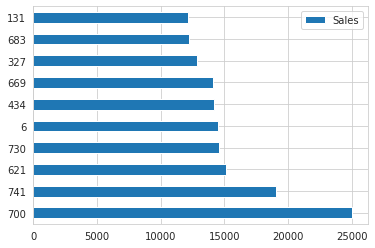

In [ ]:
top10customers = df.groupby(['Customer ID'], as_index=False)['Sales'].sum().nlargest(n=10, columns=['Sales'])
top10customers.plot.barh()

In [ ]:
top10customers

,Customer ID,Sales
700,SM-20320,25043.050
741,TC-20980,19052.218
621,RB-19360,15117.339
730,TA-21385,14595.620
6,AB-10105,14473.571
434,KL-16645,14175.229
669,SC-20095,14142.334
327,HL-15040,12873.298
683,SE-20110,12209.438
131,CC-12370,12129.072


In [ ]:
df[df["Customer ID"] == "TC-20980"]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
2072,2073,CA-2017-129693,2017-11-26,2017-12-02,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Seattle,Washington,98105,West,OFF-BI-10002954,Office Supplies,Binders,Newell 3-Hole Punched Plastic Slotted Magazine...,7.312
3185,3186,CA-2015-123498,2015-11-07,2015-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,Texas,77041,Central,OFF-BI-10000632,Office Supplies,Binders,Satellite Sectional Post Binders,26.046
3186,3187,CA-2015-123498,2015-11-07,2015-11-09,First Class,TC-20980,Tamara Chand,Corporate,United States,Houston,Texas,77041,Central,OFF-EN-10004773,Office Supplies,Envelopes,Staple envelope,74.352
6825,6826,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,OFF-ST-10001558,Office Supplies,Storage,Acco Perma 4000 Stacking Storage Drawers,32.480
6826,6827,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,TEC-CO-10004722,Technology,Copiers,Canon imageCLASS 2200 Advanced Copier,17499.950
6827,6828,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,OFF-BI-10004600,Office Supplies,Binders,Ibico Ibimaster 300 Manual Binding System,735.980
6828,6829,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,OFF-BI-10003712,Office Supplies,Binders,"Acco Pressboard Covers with Storage Hooks, 14 ...",34.370
6829,6830,CA-2017-118689,2017-10-02,2017-10-09,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Lafayette,Indiana,47905,Central,OFF-AR-10001958,Office Supplies,Art,Stanley Bostitch Contemporary Electric Pencil ...,33.960
8060,8061,CA-2016-156013,2016-09-20,2016-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,New York,11561,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,61.400
8061,8062,CA-2016-156013,2016-09-20,2016-09-26,Standard Class,TC-20980,Tamara Chand,Corporate,United States,Long Beach,New York,11561,East,OFF-BI-10002437,Office Supplies,Binders,Recycled Premium Regency Composition Covers,24.448


The second top customer is Tamara Chand

>2.3. What are the most frequently bought product sub-categories ? 
>
> Hint: look at sub-category and count the times they appear in the dataset.

In [ ]:
df['Sub-Category'].value_counts()

Binders        1492
Paper          1336
Furnishings     931
Phones          875
Storage         831
Art             784
Accessories     754
Chairs          606
Appliances      458
Labels          357
Tables          314
Envelopes       247
Bookcases       225
Fasteners       214
Supplies        184
Machines        115
Copiers          66
Name: Sub-Category, dtype: int64

The most frequently bought product sub-categories are Binders, Paper, Furnishings,...

>...What are the product sub-categories that generated the highest value of sales over the entire period?
>
> Hint: aggregate sales by sub-category.

In [ ]:
df.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)


Sub-Category
Phones         326487.6980
Chairs         322107.5310
Storage        217779.1020
Tables         202810.6280
Binders        200028.7850
Machines       189238.6310
Accessories    163881.6900
Copiers        146248.0940
Bookcases      109408.2987
Appliances     104075.4630
Furnishings     89212.0180
Paper           76736.1040
Supplies        46420.3080
Art             26697.3700
Envelopes       16126.0060
Labels          12347.7260
Fasteners        3001.9600
Name: Sales, dtype: float64

The product sub-categories that generated the highest value of sales over the entire period are Phones, chairs, storage, ...

>...What was the average purchase price of a phone sold by the store?

In [ ]:
phones = df[df['Sub-Category'] == 'Phones']
phones['Sales'].mean()

373.128797714286

>2.4 Create a new column storing the time difference between Ship Date and Order Date. What was the longest, shortest and the average delivery time difference?

In [ ]:
df['Delivery Time'] = df['Ship Date'] - df['Order Date']
print(min(df['Delivery Time']))
print(max(df['Delivery Time']))
print(df['Delivery Time'].mean())

0 days 00:00:00
7 days 00:00:00
3 days 23:04:06.031259577


Shortest delivery time : 0 days

Longest delivery time : 7 days

Average delivery time : 3 days

> 2.5. How many orders (not items) had a delivery time of 6 or more days? 
>
> Hint: you may want to use [`pd.Timedelta()`](https://pandas.pydata.org/docs/reference/api/pandas.Timedelta.html).

In [ ]:
# Converting 'Delivery Time' in string
df["Delivery Time"] = df["Delivery Time"].astype(str)
# Creating a subset of the dataframe with only delivery time >= 6 days
delivery_6_or_more = df[(df["Delivery Time"] != "0 days") & (df["Delivery Time"] != "1 days") 
                         & (df["Delivery Time"] != "2 days") & (df["Delivery Time"] != "3 days") 
                         & (df["Delivery Time"] != "4 days") & (df["Delivery Time"] != "5 days")]
# Now, I can check how many observations with unique 'Order ID' unique exist.
len(delivery_6_or_more["Order ID"].unique())

887

There are 887 orders with a delivery time greater or equal to 6 days

>2.6. What are the average delivery times for each mode of shipment? Take the average over the total number of items ordered (not over the total number of orders).

In [ ]:
# Check how many digits has the biggest delivery time
max(df["Delivery Time"])
# We observe it has only 1 ('7')

'7 days'

In [ ]:
# Let's keep only the number and delete "Days"
df["Delivery Time"] = df["Delivery Time"].apply(lambda x: x[0])

In [ ]:
# Now we can change the type of 'Delivery Time' to int
df["Delivery Time"] = df["Delivery Time"].astype(int)
df.dtypes

/usr/local/lib/python3.7/dist-packages/IPython/core/displayhook.py:260: UserWarning: Output cache limit (currently 1000 entries) hit.
Flushing oldest 200 entries.
  'Flushing oldest {cull_count} entries.'.format(sz=sz, cull_count=cull_count))


Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Delivery Time             int64
dtype: object

In [ ]:
# What are the different ship mode ?
df["Ship Mode"].describe

<bound method NDFrame.describe of 0         Second Class
1         Second Class
2         Second Class
3       Standard Class
4       Standard Class
             ...      
9795    Standard Class
9796    Standard Class
9797    Standard Class
9798    Standard Class
9799    Standard Class
Name: Ship Mode, Length: 9789, dtype: category
Categories (4, object): ['First Class', 'Same Day', 'Second Class', 'Standard Class']>

In [ ]:
# Answer for Same Day
# We create a subset of the dataframe with only 'Same Day' as ship mode
same_day = df[df["Ship Mode"] == "Same Day"]
same_day["Delivery Time"].mean()

0.04460966542750929

The average delivery time for Same Day is 0 days.

In [ ]:
# Answer for First class
# We create a subset of the dataframe with only 'First Class' as ship mode
first_class = df[df["Ship Mode"] == "First Class"]
first_class["Delivery Time"].mean()

2.179213857428381

The average delivery time for First Class is 2.2 days => 2 days

In [ ]:
# Answer for Second Class
# We create a subset of the dataframe with only 'Second Class' as ship mode
second_class = df[df["Ship Mode"] == "Second Class"]
second_class["Delivery Time"].mean()

3.24986849026828

The average delivery time for Second Class is 3.3 days => 3 days

In [ ]:
# Answer for Standard Class
# We create a subset of the dataframe with only 'Standard Class' as ship mode
standard_class = df[df["Ship Mode"] == "Standard Class"]
standard_class["Delivery Time"].mean()

5.009916224995726

The average delivery time for Standard Class is 5 days.

>2.7. Create a new column containing the year each order was placed (using Order Date). The plot the number of unique customers per year in a horizontal bar chart.

In [ ]:
# Converting 'Order Date' to string in order to apply my lambda function
df["Order Date"] = df["Order Date"].astype(str)
# My function takes the 4 first characters, i.e. the year and put them in 'Order Year'
df["Order Year"] = df["Order Date"].apply(lambda x: x[0:4])

In [ ]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Order Year
0,1,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,3,2017
1,2,CA-2017-152156,2017-11-08,2017-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,2017
2,3,CA-2017-138688,2017-06-12,2017-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,4,2017
3,4,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,7,2016
4,5,US-2016-108966,2016-10-11,2016-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,7,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,2017-05-21,2017-05-28,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980,7,2017
9796,9797,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680,5,2016
9797,9798,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880,5,2016
9798,9799,CA-2016-128608,2016-01-12,2016-01-17,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760,5,2016


In [ ]:
df["Order Year"] = df["Order Year"].astype(int)
# Now that I have done what I wanted, I convert again 'Order Date' to datetime
df["Order Date"] = pd.to_datetime(df["Order Date"], format="%Y-%m-%d", errors = 'ignore')
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode              category
Customer ID              object
Customer Name            object
Segment                category
Country                  object
City                     object
State                    object
Postal Code              object
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Delivery Time             int64
Order Year                int64
dtype: object

In [ ]:
#customers_by_year = df.groupby(['Order Year'], as_index=False)['Customer ID'].count()
#customers_by_year.plot.barh()

>2.8. Churn in 2018 as compared to 2017. Were there any customers in 2017 that the store lost in 2018? If so, how many?

In [ ]:
# create a dataframe with only values in 'Order Year' 2017
order2017 = df[(df['Order Year'] == 2017)]
# list all customers of 2017
customers2017 = order2017["Customer ID"]
# create a dataframe with only values in 'Order Year' 2018
order2018 = df[(df['Order Year'] == 2018)]
# list all customers of 2018
customers2018 = order2018["Customer ID"]
# Stock all the wanted-customers in a list
liste = []
for x in customers2017:
  if x not in customers2018:
    liste.append(x)
# Delete repetitive customers and order it
liste = set(liste)
# Checking the quantity of customers by checking the lenght of the list
len(liste)

635

There are 635 customers who bought in 2017 but not in 2018

>2.9. Generate a table with the average sales by customer segment and by year (take the simple average over the number of items sold). Plot in a line chart the average sales by customer segement over time, with the years on x-axis, the average sales on the y-axis, and a line for each segment.

In [ ]:
table = df.groupby(["Segment", "Order Year"], as_index=False)["Sales"].mean()
print(table)


        Segment  Order Year       Sales
0      Consumer        2015  251.633302
1      Consumer        2016  238.200804
2      Consumer        2017  223.269145
3      Consumer        2018  200.469005
4     Corporate        2015  212.641424
5     Corporate        2016  189.902305
6     Corporate        2017  263.348456
7     Corporate        2018  243.634951
8   Home Office        2015  290.234240
9   Home Office        2016  222.101830
10  Home Office        2017  226.382196
11  Home Office        2018  242.532951


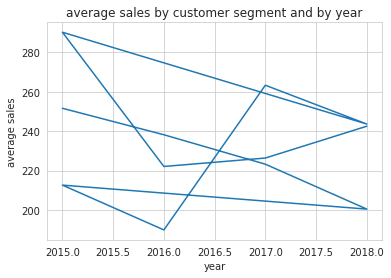

In [ ]:
plt.plot(table["Order Year"],table["Sales"])
plt.title('average sales by customer segment and by year')
plt.xlabel('year')
plt.ylabel('average sales')
plt.show()
# the plot is not optimal, I will review it later. I could answer the quiz question by just watching at the table

>2.10. Using `folium`, plot on a map the location of a subset of customers defined below, using circle markers proportionate to the value of their aggregate purchases.
>
> Only include 2018 data for corporate customers with per item purchases above USD 100. 
>
>A separate database with latitude and longitude measures for US zip codes is provided below. Merge the latitude and longitude with your transactions dataset. Make sure to drop any missing values before plotting your map.

In [ ]:
# import required packages
import folium

In [ ]:
# import latitude and longitude data
latlong=pd.read_csv('https://gist.githubusercontent.com/erichurst/7882666/raw/5bdc46db47d9515269ab12ed6fb2850377fd869e/US%2520Zip%2520Codes%2520from%25202013%2520Government%2520Data', 
                    dtype={'ZIP': 'str'})
print(latlong)

         ZIP        LAT         LNG
0      00601  18.180555  -66.749961
1      00602  18.361945  -67.175597
2      00603  18.455183  -67.119887
3      00606  18.158345  -66.932911
4      00610  18.295366  -67.125135
...      ...        ...         ...
33139  99923  56.002315 -130.041026
33140  99925  55.550204 -132.945933
33141  99926  55.138352 -131.470424
33142  99927  56.239062 -133.457924
33143  99929  56.370751 -131.693301

[33144 rows x 3 columns]


In [ ]:
# YOUR CODE HERE FOR SELECTING THE SUBSET
corp_cust_2018_more100 = df[(df["Order Year"] == 2018) & (df["Segment"] == "Corporate") & (df["Sales"] > 100)]
corp_cust_2018_more100

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Order Year
41,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,5,2018
143,144,CA-2018-106180,2018-09-18,2018-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,5,2018
270,271,CA-2018-163979,2018-12-28,2019-01-02,Second Class,KH-16690,Kristen Hastings,Corporate,United States,San Francisco,California,94110,West,OFF-ST-10003208,Office Supplies,Storage,Adjustable Depth Letter/Legal Cart,725.840,5,2018
359,360,CA-2018-155698,2018-03-08,2018-03-11,First Class,VB-21745,Victoria Brennan,Corporate,United States,Columbus,Georgia,31907,South,OFF-AP-10001124,Office Supplies,Appliances,Belkin 8 Outlet SurgeMaster II Gold Surge Prot...,647.840,3,2018
377,378,US-2018-134481,2018-08-27,2018-09-01,Standard Class,AR-10405,Allen Rosenblatt,Corporate,United States,Franklin,Massachusetts,2038,East,FUR-TA-10004915,Furniture,Tables,"Office Impressions End Table, 20-1/2""H x 24""W ...",1488.424,5,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9606,9607,US-2018-122672,2018-11-04,2018-11-09,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Lancaster,Ohio,43130,East,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",194.352,5,2018
9617,9618,CA-2018-160633,2018-11-16,2018-11-21,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Bowling Green,Ohio,43402,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,899.982,5,2018
9619,9620,CA-2018-160633,2018-11-16,2018-11-21,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Bowling Green,Ohio,43402,East,TEC-AC-10002335,Technology,Accessories,Logitech Media Keyboard K200,139.960,5,2018
9737,9738,CA-2018-129294,2018-03-16,2018-03-21,Standard Class,KD-16615,Ken Dana,Corporate,United States,Los Angeles,California,90032,West,OFF-ST-10002615,Office Supplies,Storage,"Dual Level, Single-Width Filing Carts",310.120,5,2018


In [ ]:
# YOUR CODE HERE FOR MERGING THE SUBSET WITH THE LATITUDE AND LONGITUDE DATA
latlong.rename(columns={'ZIP': 'Postal Code'}, inplace=True)
latlong

,Postal Code,LAT,LNG
0,00601,18.180555,-66.749961
1,00602,18.361945,-67.175597
2,00603,18.455183,-67.119887
3,00606,18.158345,-66.932911
4,00610,18.295366,-67.125135
...,...,...,...
33139,99923,56.002315,-130.041026
33140,99925,55.550204,-132.945933
33141,99926,55.138352,-131.470424
33142,99927,56.239062,-133.457924


In [ ]:
corp_cust_2018_more100_merged_inner = corp_cust_2018_more100.merge(latlong, how="inner", on="Postal Code")
corp_cust_2018_more100_merged_inner

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Delivery Time,Order Year,LAT,LNG
0,42,CA-2018-120999,2018-09-10,2018-09-15,Standard Class,LC-16930,Linda Cazamias,Corporate,United States,Naperville,Illinois,60540,Central,TEC-PH-10004093,Technology,Phones,Panasonic Kx-TS550,147.168,5,2018,41.764670,-88.145428
1,144,CA-2018-106180,2018-09-18,2018-09-23,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004327,Office Supplies,Paper,Xerox 1911,143.700,5,2018,37.758797,-122.485128
2,1753,CA-2018-116715,2018-12-02,2018-12-05,First Class,VW-21775,Victoria Wilson,Corporate,United States,San Francisco,California,94122,West,OFF-ST-10004340,Office Supplies,Storage,"Fellowes Mobile File Cart, Black",559.620,3,2018,37.758797,-122.485128
3,1754,CA-2018-116715,2018-12-02,2018-12-05,First Class,VW-21775,Victoria Wilson,Corporate,United States,San Francisco,California,94122,West,OFF-PA-10004475,Office Supplies,Paper,Xerox 1940,109.920,3,2018,37.758797,-122.485128
4,3299,CA-2018-136308,2018-11-16,2018-11-16,Same Day,MW-18235,Mitch Willingham,Corporate,United States,San Francisco,California,94122,West,TEC-MA-10000488,Technology,Machines,Bady BDG101FRU Card Printer,1919.976,0,2018,37.758797,-122.485128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
346,9597,CA-2018-104619,2018-01-24,2018-01-29,Standard Class,KD-16495,Keith Dawkins,Corporate,United States,San Jose,California,95123,West,OFF-BI-10004318,Office Supplies,Binders,Ibico EB-19 Dual Function Manual Binding System,276.784,5,2018,37.244238,-121.831604
347,9598,CA-2018-104619,2018-01-24,2018-01-29,Standard Class,KD-16495,Keith Dawkins,Corporate,United States,San Jose,California,95123,West,TEC-PH-10000193,Technology,Phones,Jensen SMPS-640 - speaker phone,110.352,5,2018,37.244238,-121.831604
348,9607,US-2018-122672,2018-11-04,2018-11-09,Standard Class,HG-14965,Henry Goldwyn,Corporate,United States,Lancaster,Ohio,43130,East,OFF-ST-10002344,Office Supplies,Storage,"Carina 42""Hx23 3/4""W Media Storage Unit",194.352,5,2018,39.696463,-82.614717
349,9618,CA-2018-160633,2018-11-16,2018-11-21,Standard Class,BS-11380,Bill Stewart,Corporate,United States,Bowling Green,Ohio,43402,East,TEC-CO-10002095,Technology,Copiers,Hewlett Packard 610 Color Digital Copier / Pri...,899.982,5,2018,41.418411,-83.656651


In [ ]:
# YOUR CODE HERE FOR GENERATING THE MAP
# TO DO

## 3. Regression Analysis

For this section please work on data aggregated by daily sales in USD. Here we are providing the dataframe for you. The regression dataset contains observations on sales aggregated by day, including:
* the date of the orders
* the number of orders received on that day
* the number of items ordered on that day
* the number of customer segments represented in the orders for that day
* the number of product sub-categories included
* the aggregated value of daily sales in USD
* the year, the month, and the day of the transactions stored separately.

>Load the data.

In [ ]:
#Upload the data
new_data=pd.read_csv('https://raw.githubusercontent.com/michalis0/DataMining_and_MachineLearning/master/data/regression_sales.csv')
new_data

,Order Date,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
0,03/01/2015,1,1,1,1,16.4480,2015,1,3,2.800204
1,04/01/2015,1,3,1,3,288.0600,2015,1,4,5.663169
2,05/01/2015,1,1,1,1,19.5360,2015,1,5,2.972259
3,06/01/2015,3,9,3,6,4407.1000,2015,1,6,8.390972
4,07/01/2015,1,2,1,2,87.1580,2015,1,7,4.467723
...,...,...,...,...,...,...,...,...,...,...
1224,26/12/2018,4,4,3,3,814.5940,2018,12,26,6.702690
1225,27/12/2018,1,2,1,2,177.6360,2018,12,27,5.179737
1226,28/12/2018,10,19,3,10,1657.3508,2018,12,28,7.412976
1227,29/12/2018,6,12,2,7,2915.5340,2018,12,29,7.977808


>3.1.1. Generate descriptive statistics

In [ ]:
new_data.describe()

,number_orders,number_items,number_segments,number_subcategory,sales_per_day,year,month,day,log_sales
count,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000,1229.000000
mean,4.000000,7.965012,2.004068,5.266884,1832.878285,2016.536208,6.787632,15.794142,6.714374
std,2.799197,6.152745,0.770475,3.016305,2283.923773,1.124801,3.410032,8.781964,1.525230
min,1.000000,1.000000,1.000000,1.000000,2.025000,2015.000000,1.000000,1.000000,0.705570
25%,2.000000,3.000000,1.000000,3.000000,377.736000,2016.000000,4.000000,8.000000,5.934196
50%,3.000000,6.000000,2.000000,5.000000,1053.614000,2017.000000,7.000000,16.000000,6.959981
75%,5.000000,11.000000,3.000000,7.000000,2379.994000,2018.000000,10.000000,23.000000,7.774853
max,19.000000,38.000000,3.000000,14.000000,28106.716000,2018.000000,12.000000,31.000000,10.243764


>3.1.2. Plot the distribution of sales per day, using bins=50. Then create a new column equal to the natural logarithm of sales per day and plot its histogram as well.

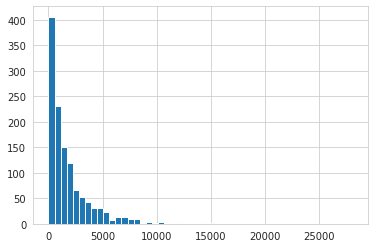

In [ ]:
new_data["sales_per_day"].hist(bins=50)

>3.1.3. Create a pairplot with the log of sales per day on the horizontal axis and on the vertical axis the number of items ordered and number of orders.

In [ ]:
#import seaborn
#seaborn.pairplot(data="new_data", x_vars=["log_sales"], y_vars=["number_items", "number_orders"])

## Simple Linear Regression

>3.2 Regress log of sales on number of orders, number of items, number of segments, year, month and day.
>
>3.2.1. Select the dependent (y) and the independent variables (X).

In [ ]:
#from sklearn.preprocessing import PolynomialFeatures
y = np.array(new_data["log_sales"])
X = np.array(new_data[["number_orders", "number_items","number_segments", "year", "month", "day"]])
X.shape, y.shape

((1229, 6), (1229,))

>3.2.2 Split your dataset into a training set (80%) and a test set (20%). Use sklearn.model_selection.train_test_split() and set the **random_state to 77.**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)

>3.2.3 Train a linear regression model on the training data. What is the R^2 score for the test data?

In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression(fit_intercept=True)
LR.fit(X_train, y_train)
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(X_test, y_test))


params:  [-8.50696759e-02  1.69065368e-01  4.93390631e-01  2.61469395e-03
 -5.27419820e-03 -1.70831086e-04]
constant:  -0.5142540595093843
R^2 score:  0.5112023472456444


>3.2.4. Predict what would be the total value of sales in USD on 15 January 2019 assuming there were 3 orders received on that day, including 9 items, from 3 segments.

In [ ]:
print("number_orders: ", 3, "number_items: ", 9, "number_segments: ", 3, "year: ", 2019, "month: ", 1, "day: ", 15, "Sales: ", np.exp(LR.predict(np.array([3, 9, 3, 2019, 1, 15]).reshape(-1,6))))


number_orders:  3 number_items:  9 number_segments:  3 year:  2019 month:  1 day:  15 Sales:  [1814.4316237]


## Linear Regression with Standardization

> 3.2.5. Apply a standard scaler to the following columns: number_orders, number_items, number_segments. 
> 
> Hint: use the scaler on the already split data. Fit-transform the scaler on X_train and apply transform on X_test.

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_X_train = np.concatenate([scaler.fit_transform(X_train[:, :3]), X_train[:, 3:]], axis=1)
scaled_X_test = np.concatenate([scaler.transform(X_test[:, :3]), X_test[:, 3:]], axis=1)
print(X_train)
print(scaled_X_train)
print(X_test)
print(scaled_X_test)

[[   9   19    3 2017   11    5]
 [   1    2    1 2017    1    2]
 [   1    2    1 2016    5   20]
 ...
 [   3    7    3 2015   10   19]
 [   2    6    1 2017    1   25]
 [   1    1    1 2017    6   15]]
[[ 1.86272506e+00  1.85630174e+00  1.28837225e+00  2.01700000e+03
   1.10000000e+01  5.00000000e+00]
 [-1.09059548e+00 -9.76635098e-01 -1.29099623e+00  2.01700000e+03
   1.00000000e+00  2.00000000e+00]
 [-1.09059548e+00 -9.76635098e-01 -1.29099623e+00  2.01600000e+03
   5.00000000e+00  2.00000000e+01]
 ...
 [-3.52265345e-01 -1.43418381e-01  1.28837225e+00  2.01500000e+03
   1.00000000e+01  1.90000000e+01]
 [-7.21430413e-01 -3.10061725e-01 -1.29099623e+00  2.01700000e+03
   1.00000000e+00  2.50000000e+01]
 [-1.09059548e+00 -1.14327844e+00 -1.29099623e+00  2.01700000e+03
   6.00000000e+00  1.50000000e+01]]
[[   5   13    3 2015   10    3]
 [  16   23    3 2018   11    3]
 [   3    9    2 2018    3    5]
 ...
 [   3    3    2 2018    4   22]
 [   3    5    3 2018    6   27]
 [   1    2   

> 3.2.6. Train a linear regression model with the standardised data. What is the R^2 score for the test data?

In [ ]:
LR = LinearRegression(fit_intercept=True)
LR.fit(scaled_X_train, y_train)
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(scaled_X_test, y_test))
# Checking the most signifiant coefficient. To do so, I take the absolute value of each coeff. and then take the maximum
print(max(abs(LR.coef_)))

params:  [-2.30438043e-01  1.01453418e+00  3.82567001e-01  2.61469395e-03
 -5.27419820e-03 -1.70831086e-04]
constant:  1.465605187525127
R^2 score:  0.5112023472456444
1.0145341814516828


The highest coefficient is the one corresponding to 'number_items'

> 3.2.7. Predict what would be the total number of sales in USD on 15 January 2019 assuming 3 orders received on that day, including 9 items, from 3 segments

In [ ]:
X_test = np.array([3, 9, 3, 2019, 1, 15]).reshape(-1, 6)
X_test = np.concatenate([scaler.transform(X_test[:, :3]), X_test[:, 3:]], axis=1)
print("number_orders: ", 3, "number_items: ", 9, "number_segments: ", 3, "year: ", 2019, "month: ", 1, "day: ", 15, "Sales: ", np.exp(LR.predict(X_test)))



number_orders:  3 number_items:  9 number_segments:  3 year:  2019 month:  1 day:  15 Sales:  [1814.4316237]


>3.2.8. Looking at the coefficients from the linear regression with standardization, identify which variable is the most significant in this model. 

In [ ]:
# It is the coefficient with biggest absolute value, i.e. 'number_items'

> 3.2.9. Calculate the adjusted R-squared and identify the optimum regression coefficients using linear regression with standardisation. 
>
> Hint: calculate the adjusted R-squared for the full model with linear regression and standardisation (as above). The try dropping either one of the columns: 'number_orders', 'number_items', 'number_segments' and recalculate adjusted R-squared for every new model. Identify which combination of features gives the highest adjusted R-squared. 
>
>Check out this documentation file on the [adjusted R-squared](https://www.statology.org/adjusted-r-squared-in-python/).

Train the model when you drop `number_segments` and calculate the adjusted R-squared.

In [ ]:
# drop 'number_segments'
y = np.array(new_data["log_sales"])
X = np.array(new_data[["number_orders","number_items", "year", "month", "day"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
scaler = StandardScaler()
scaled_X_train = np.concatenate([scaler.fit_transform(X_train[:, :3]), X_train[:, 3:]], axis=1)
scaled_X_test = np.concatenate([scaler.transform(X_test[:, :3]), X_test[:, 3:]], axis=1)
LR = LinearRegression(fit_intercept=True)
LR.fit(scaled_X_train, y_train)
print("without 'number_segments'")
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(scaled_X_test, y_test))


without 'number_segments'
params:  [ 3.66381791e-02  1.01189143e+00  2.02773629e-02 -2.41619242e-03
 -7.41734301e-04]
constant:  6.728109558802486
R^2 score:  0.46814236692923994


R-squared where 'number_segments' is dropped = 0.4681

Train the model when you drop `number_items` and calculate the adjusted R-squared.

In [ ]:
# drop 'number_items'
y = np.array(new_data["log_sales"])
X = np.array(new_data[["number_orders","number_segments", "year", "month", "day"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
scaler = StandardScaler()
scaled_X_train = np.concatenate([scaler.fit_transform(X_train[:, :3]), X_train[:, 3:]], axis=1)
scaled_X_test = np.concatenate([scaler.transform(X_test[:, :3]), X_test[:, 3:]], axis=1)
LR = LinearRegression(fit_intercept=True)
LR.fit(scaled_X_train, y_train)
print("without 'number_items'")
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(scaled_X_test, y_test))

without 'number_items'
params:  [ 0.67898571  0.37965762 -0.01499908 -0.00352005 -0.00290206]
constant:  6.770005504692045
R^2 score:  0.44289024037307934


R-squared where 'number_items' is dropped = 0.4429

Train the model when you drop `number_orders` and calculate the adjusted R-squared.

In [ ]:
# drop 'number_orders'
y = np.array(new_data["log_sales"])
X = np.array(new_data[["number_items","number_segments", "year", "month", "day"]])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77)
scaler = StandardScaler()
scaled_X_train = np.concatenate([scaler.fit_transform(X_train[:, :3]), X_train[:, 3:]], axis=1)
scaled_X_test = np.concatenate([scaler.transform(X_test[:, :3]), X_test[:, 3:]], axis=1)
LR = LinearRegression(fit_intercept=True)
LR.fit(scaled_X_train, y_train)
print("without 'number_orders'")
print("params: ", LR.coef_)
print("constant: ", LR.intercept_)
print("R^2 score: ", LR.score(scaled_X_test, y_test))


without 'number_orders'
params:  [ 8.52980233e-01  3.30335835e-01 -1.07764154e-02 -1.11631483e-02
 -5.81992642e-04]
constant:  6.784539419906433
R^2 score:  0.5093812354361285


R-squared where 'number_orders' is dropped = 0.5094